In [1]:
import sys
sys.path.insert(0, '..')
from doe_xstock.database import SQLiteDatabase
import pandas as pd
from citylearn.end_use_load_profiles.neighborhood import Neighborhood, SampleMethod

In [2]:
neighborhood = Neighborhood(random_seed=0)

In [3]:
# bldg_ids, labels, sample_metadata = neighborhood.sample_buildings(sample_method=SampleMethod.RANDOM)

In [4]:
# bldg_ids, labels, sample_metadata = neighborhood.sample_buildings(sample_method=SampleMethod.METADATA_CLUSTER_FREQUENCY)

In [5]:
# IDD_FILEPATH = '/Applications/EnergyPlus-22-1-0/PreProcess/IDFVersionUpdater/V22-1-0-Energy+.idd'
IDD_FILEPATH = '/Applications/EnergyPlus-9-6-0/PreProcess/IDFVersionUpdater/V9-6-0-Energy+.idd'
simulators = neighborhood.simulate_energy_plus(
    bldg_ids=[35],
    idd_filepath=IDD_FILEPATH,
    # models=['/Users/kingsleyenweye/Downloads/bldg0000035-up00-2050/run/in.osm'],
    # schedules=['/Users/kingsleyenweye/Downloads/bldg0000035-up00-2050/schedules.csv'],
    # epw='/Users/kingsleyenweye/Downloads/weather-ricardo/G4804530.epw',
    # osm=True,
)
# simulators = neighborhood.simulate_energy_plus(bldg_ids[0:1], IDD_FILEPATH)

[openstudio.energyplus.ForwardTranslator] <0> Surface 'Surface 11' is adiabatic, removing all sub surfaces
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[utilities.idf.WorkspaceObject] <0> Object of type 'Schedule:Constant' and named 'Always Off Discrete', points to an object named OnOff 1 from field 1, but that object cannot be located.
[utilities.idf.WorkspaceObject] <0> Object of type 'Schedule:Constant' and named 'Always On Continuous', points 

Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]
EnergyPlus Completed Successfully.


[openstudio.energyplus.ForwardTranslator] <0> Surface 'Surface 11' is adiabatic, removing all sub surfaces
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[openstudio.energyplus.ForwardTranslator] <0> Cannot find file ""
[utilities.idf.WorkspaceObject] <0> Object of type 'Schedule:Constant' and named 'Always Off Discrete', points to an object named OnOff 1 from field 1, but that object cannot be located.
[utilities.idf.WorkspaceObject] <0> Object of type 'Schedule:Constant' and named 'Always On Continuous', points 

Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]
Program terminated: EnergyPlus Terminated--Error(s) Detected.
Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]
Program terminated: EnergyPlus Terminated--Error(s) Detected.
Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]
Program terminated: EnergyPlus Terminated--Error(s) Detected.
Could not find platform independent libraries <prefix>
Could not find platform dependent libraries <exec_prefix>
Consider setting $PYTHONHOME to <prefix>[:<exec_prefix>]
EnergyPlus Completed Successfully.
Could not find platform independent libraries <prefix>
Could not find platform dependent libraries 

In [6]:
training_data = neighborhood.get_lstm_training_data(simulators)
display(training_data.head())

,bldg_id,reference,reference_name,timestep,month,day,day_name,day_of_week,hour,minute,direct_solar_radiation,diffuse_solar_radiation,outdoor_air_temperature,average_indoor_air_temperature,occupant_count,cooling_load,heating_load
0,35,0,ideal,1,1,1,Monday,1,1,0,0.0,0.0,10.0,22.220902,2.0,0.0,0.605167
1,35,0,ideal,2,1,1,Monday,1,2,0,0.0,0.0,10.0,22.220923,2.0,0.0,0.793729
2,35,0,ideal,3,1,1,Monday,1,3,0,0.0,0.0,9.4,22.221038,2.0,0.0,0.721676
3,35,0,ideal,4,1,1,Monday,1,4,0,0.0,0.0,10.6,22.221158,2.0,0.0,0.835870
4,35,0,ideal,5,1,1,Monday,1,5,0,0.0,0.0,10.6,22.221236,2.0,0.0,0.837311


<Axes: >

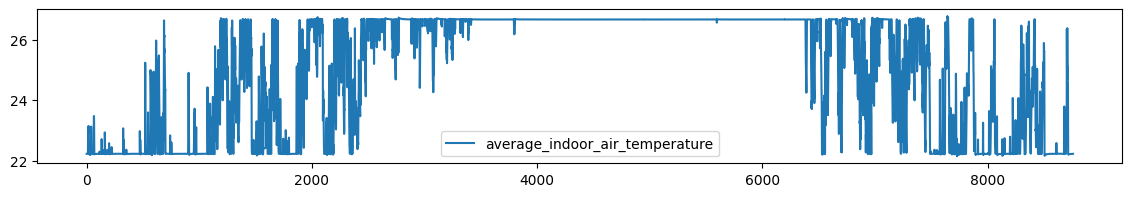

In [7]:
plot_data = training_data[training_data['reference']==0].copy()
# plot_data['average_indoor_air_temperature'] = (plot_data['average_indoor_air_temperature'] * 9/5) + 32
plot_data[['average_indoor_air_temperature']].plot(figsize=(14, 2))

<Axes: >

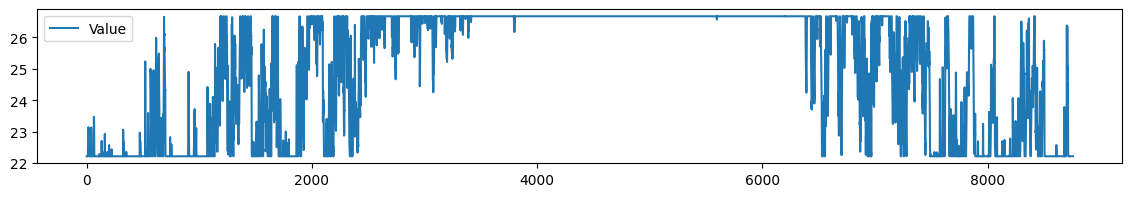

In [8]:
filepath = '/Users/kingsleyenweye/Desktop/INTELLIGENT_ENVIRONMENT_LAB/citylearn/CityLearn/examples/energyplus_output/resstock_2021_tmy3_release_1-35/resstock_2021_tmy3_release_1-35-ideal/resstock_2021_tmy3_release_1-35-ideal.sql'
data = SQLiteDatabase(filepath).query_table("""
SELECT
    r.TimeIndex,
    r.ReportDataDictionaryIndex,
    r.Value*z.conditioned_floor_area_proportion AS Value
FROM ReportData r
LEFT JOIN ReportDataDictionary d ON d.ReportDataDictionaryIndex = r.ReportDataDictionaryIndex
INNER JOIN (SELECT * FROM zone_metadata WHERE is_cooled + is_heated >= 1) z ON z.zone_name = d.KeyValue
WHERE d.Name IN ('Zone Air Temperature')                                      
""")
data[['Value']].plot(figsize=(14, 2))

<Axes: >

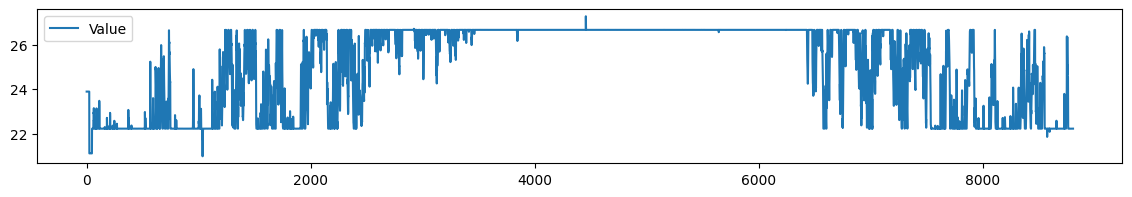

In [9]:
filepath = '/Users/kingsleyenweye/Desktop/INTELLIGENT_ENVIRONMENT_LAB/citylearn/CityLearn/examples/energyplus_output/resstock_2021_tmy3_release_1-35/resstock_2021_tmy3_release_1-35-mechanical/resstock_2021_tmy3_release_1-35-mechanical.sql'
data = SQLiteDatabase(filepath).query_table("""
SELECT
    r.TimeIndex,
    r.ReportDataDictionaryIndex,
    d.KeyValue,
    r.Value AS Value
FROM ReportData r
LEFT JOIN ReportDataDictionary d ON d.ReportDataDictionaryIndex = r.ReportDataDictionaryIndex
WHERE d.Name IN ('Zone Air Temperature') AND d.KeyValue = 'LIVING ZONE'                             
""")
data[['Value']].plot(figsize=(14, 2))

In [10]:
data

,TimeIndex,ReportDataDictionaryIndex,KeyValue,Value
0,1,653,LIVING ZONE,23.888962
1,2,653,LIVING ZONE,23.888944
2,3,653,LIVING ZONE,23.888957
3,4,653,LIVING ZONE,23.889061
4,5,653,LIVING ZONE,23.889163
...,...,...,...,...
8803,8804,653,LIVING ZONE,22.221964
8804,8805,653,LIVING ZONE,22.222160
8805,8806,653,LIVING ZONE,22.221144
8806,8807,653,LIVING ZONE,22.221741
